In [1]:
import pandas as pd
import numpy as np
import datetime
from consts import PATH, RFM_PATH

In [2]:
data = pd.read_parquet(PATH)

In [16]:
last_two_months = data[data['rep_date'] >= datetime.date(2022, 12, 23)].groupby('partner', as_index=True).max()
grouped = data[data['rep_date'] < datetime.date(2022, 12, 23)].groupby('partner').max()

In [6]:
old_trans = grouped[grouped['rep_date'] < datetime.date(2022, 11, 23)]

In [77]:
alive_dist = pd.DataFrame(data={'count' : np.zeros(60), 'days' : np.arange(0, 60, 1)}, index=np.arange(0, 60, 1))
alive_dist['count'] = alive_dist['days'].apply(
    lambda d: len(last_two_months.loc[last_two_months.index.intersection(grouped[(grouped['rep_date'] < (datetime.date(2022, 12, 23) - datetime.timedelta(days=d)))].index)]))

**alive_dist** - Распределение ухода клиентов спустя какое-то время

<Axes: >

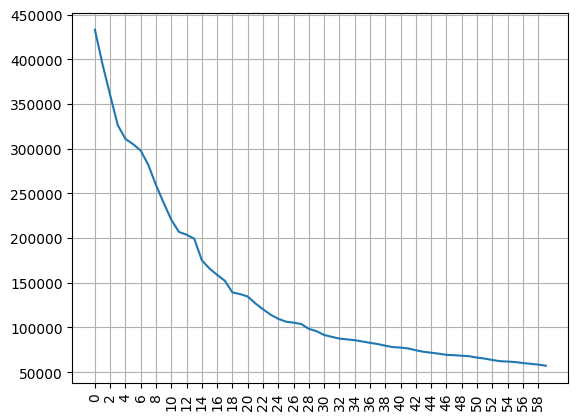

In [96]:
alive_dist['count'].plot(grid=True, xticks=np.arange(0, 60, 2), rot=90)

<Axes: ylabel='Density'>

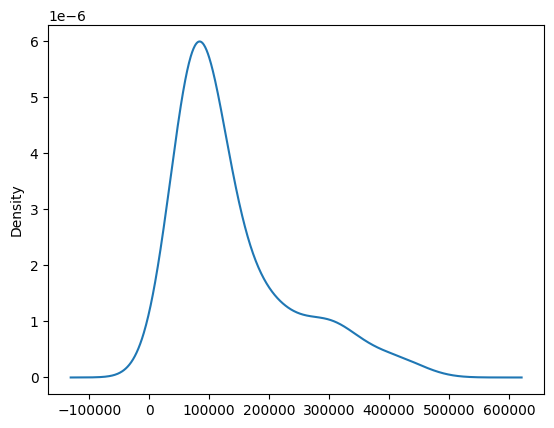

In [93]:
alive_dist['count'].plot.kde(grid=True)

In [81]:
alive_dist.describe()

,count,days
count,60.000000,60.000000
mean,137724.900000,29.500000
std,94626.972064,17.464249
min,57183.000000,0.000000
25%,71479.500000,14.750000
50%,93725.000000,29.500000
75%,168203.500000,44.250000
max,433127.000000,59.000000
